# The botanist

The botanist is an expert at recognizing vegetal species. Our botanist's specialty is the iris. Here are 3 species of iris that our specialist is able to name:

<div style="display: flex">
    <div style="padding:20px;">
        <img src='https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg' width=200>
        <p style='text-align: center;'><em>Iris versicolor</em></p>
    </div>
    <div style="padding:20px;">
        <img src='https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/440px-Kosaciec_szczecinkowaty_Iris_setosa.jpg' width=200>
        <p style='text-align: center;'><em>Iris setosa</em></p>
    </div>
    <div style="padding:20px;">
        <img src='https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/1472px-Iris_virginica.jpg' width=200>
        <p style='text-align: center;'><em>Iris virginica</em></p>
    </div>
</div>

Are you able to differentiate them?

## The task

As we know nothing about flowers, let's use a Machine Learning algorithm to help us classify these flowers based on their characteristics.

## Load the dataset

Let's load the Scikit Learn's [Iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) and store it in a DataFrame. You should get:

<img src='https://wagon-public-datasets.s3.amazonaws.com/data-science-images/ML/iris_datafame.png' width=600>

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [10]:
# YOUR CODE HERE
from sklearn.datasets import load_iris
import pandas as pd 

iris = load_iris()
iris_df = pd.DataFrame(data=iris["data"], columns=iris["feature_names"])
iris_df["species"] = iris["target"]
iris_df["species"] = iris_df["species"].apply(lambda x: iris["target_names"][x])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<details>
    <summary>
        💡Hint
    </summary>
    Inspect what is returned by the <code>load_iris</code> method to build the DataFrame.
</details>

❓What are the characteristics of the iris?

Sepal and petal dimensions in `cm`, sepals and petals are part of the flowers.
<img src='https://wagon-public-datasets.s3.amazonaws.com/data-science-images/ML/iris_sepal_petal.jpeg' width=200>

❓How many species of iris are there in this dataset?

In [19]:
# YOUR CODE HERE
iris_df["species"].nunique()

3

❓How many observations for each species are there in the dataset?

In [20]:
# YOUR CODE HERE
iris_df["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

## Data visualization

Plot the `'petal width'` against the `'petal length'` with a different color for each species:

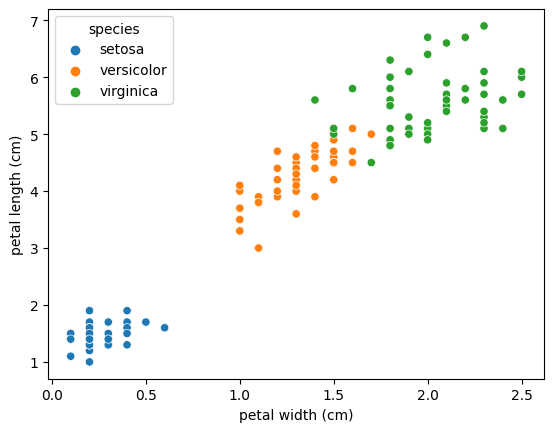

In [23]:
# YOUR CODE HERE
import seaborn as sns 

sns.scatterplot(data=iris_df, x="petal width (cm)", y="petal length (cm)", hue="species");

❓Are you able to differentiate these species based on your observations?

The _Iris setosa_ species seems to have clearly smaller petals than the other 2 species.

ℹ️ You can see that this difference is also reflected in the photos above

## Modeling

There are two strategies to tackle the multiclass problem:

- One vs One
- One vs All (One vs Rest)

### One vs One
- Train **a model for each pair of classes** within the dataset
- At prediction time, the class which received the most votes is selected

<img src='images/ovo_multiclass.png' width=500 style='margin:auto'> 


👍Considers pair-specific differences


👎Creates a large number of sub models. Computationally expensive


### One vs Rest (One vs All)

- Train **one model per class** against all others combined
- At prediction time, the class with the highest probability is selected

<img src='images/ova_multiclass.png' width=500 style='margin:auto'> 

👍Less computationally expensive


👎Loses pair-specific differences that get diluted in a combination of classes


## One Vs Rest

👇 Evaluate a model that predicts the iris species according to its features. Implement a One vs Rest multiclass strategy by tweaking the right parameter of `LogisticRegression`. Evaluate it by cross-validation and record the time it takes to do so.

In [32]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score, cross_validate

model = LogisticRegression(multi_class="ovr")

X = iris_df.drop(columns=["species"])
y = iris_df["species"]

cv_results = cross_validate(model, X, y, cv=5)
test_scores_mean = cv_results["test_score"].mean()
print(test_scores_mean)
time = (cv_results["fit_time"] + cv_results["score_time"]).sum()
time

# cross_val_score -> returns the scores 

0.9400000000000001


0.12132596969604492

## One Vs One

👇 This time, implement a `OneVsOneClassifier`. There is no parameter to directly specify a OvO multiclass strategy in `LogisticRegression`. You'll need to find an alternative way to do so 😉

Again, Evaluate by cross-validation and record the time it takes to do so.

In [34]:
# YOUR CODE HERE
from sklearn.multiclass import OneVsOneClassifier

model = OneVsOneClassifier(LogisticRegression())

cv_results = cross_validate(model, X, y, cv=5)
test_scores_mean = cv_results["test_score"].mean()
print(test_scores_mean)
time = (cv_results["fit_time"] + cv_results["score_time"]).sum()
time

0.9733333333333334


0.12210512161254883

ℹ️ As expected, the One on One strategy has better results because it preserves pair-specific relationships. However, it is more computationally expensive.

❓The botanist is able to find the right species 9 times over 10, can you beat him?

<details>
<summary> 👉Solution </summary>
You should get a mean accuracy of 97% which is more than 90%. So our algorithm beats the botanist!

</details>

# 🏁 